# Final Project \(Climate Time Series)
### Group Members :- Dhruv Rana, Ahnaf Hasan
---

### Import

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection 
import seaborn as sns

### Load Data

In [43]:
train_df = pd.read_csv("DailyDelhiClimateTrain.csv")
test_df  = pd.read_csv("DailyDelhiClimateTest.csv")

### Examine Training Data

In [44]:
train_df.set_index("date", inplace=True)
train_df.index = pd.to_datetime(train_df.index)

_Set the dates as index so we can plot the data later_

In [45]:
train_df.shape

(1462, 4)

_The datset has 1462 samples and 5 features_

In [46]:
train_df.head(8)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286


In [47]:
train_df.tail(8)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-25,14.000000,94.300000,9.085000,1014.350000
2016-12-26,17.142857,74.857143,8.784211,1016.952381
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


_The datset has climate recordings of : mean temprature, humidity, wind speed , and mean pressure for each day strating from 2013 up-till first day of 2017_

In [48]:
train_df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


### Visulaize Data

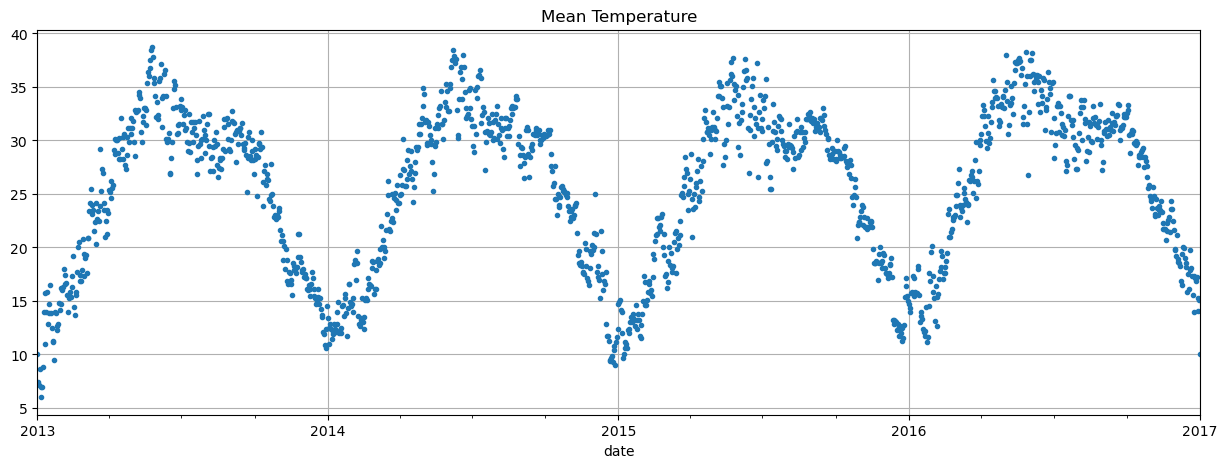

In [49]:
train_df['meantemp'].plot(figsize=(15, 5), style='.')
plt.title("Mean Temperature")
plt.grid()
plt.show()

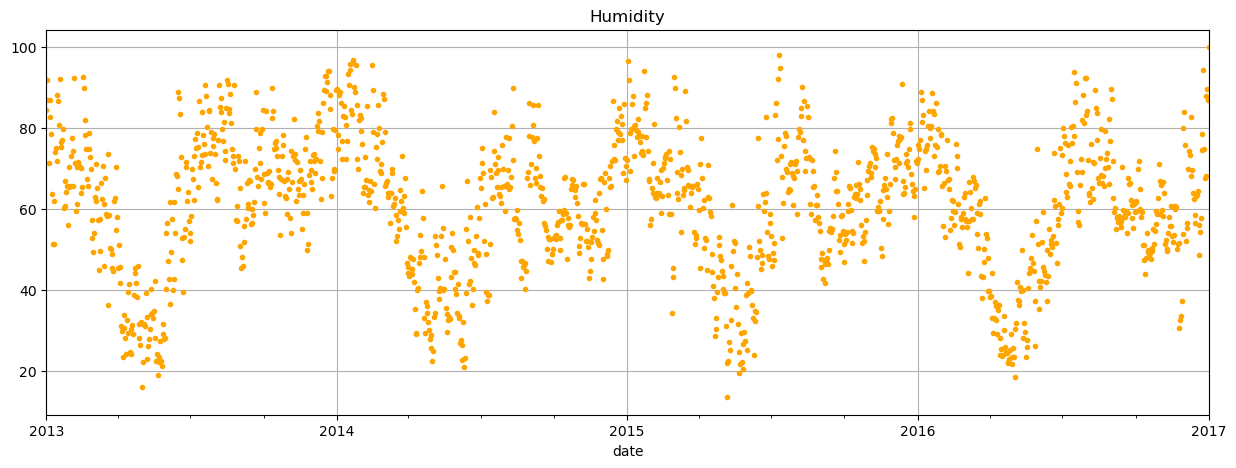

In [50]:
train_df['humidity'].plot(figsize=(15, 5), style='.',color="Orange")
plt.title("Humidity")
plt.grid()
plt.show()

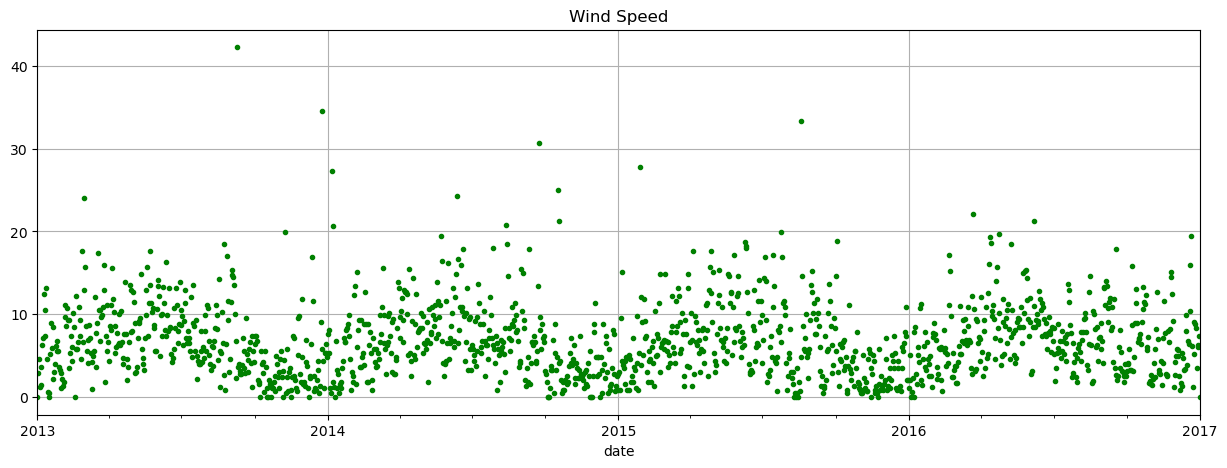

In [51]:
train_df['wind_speed'].plot(figsize=(15, 5), style='.',color="Green")
plt.title("Wind Speed")
plt.grid()
plt.show()

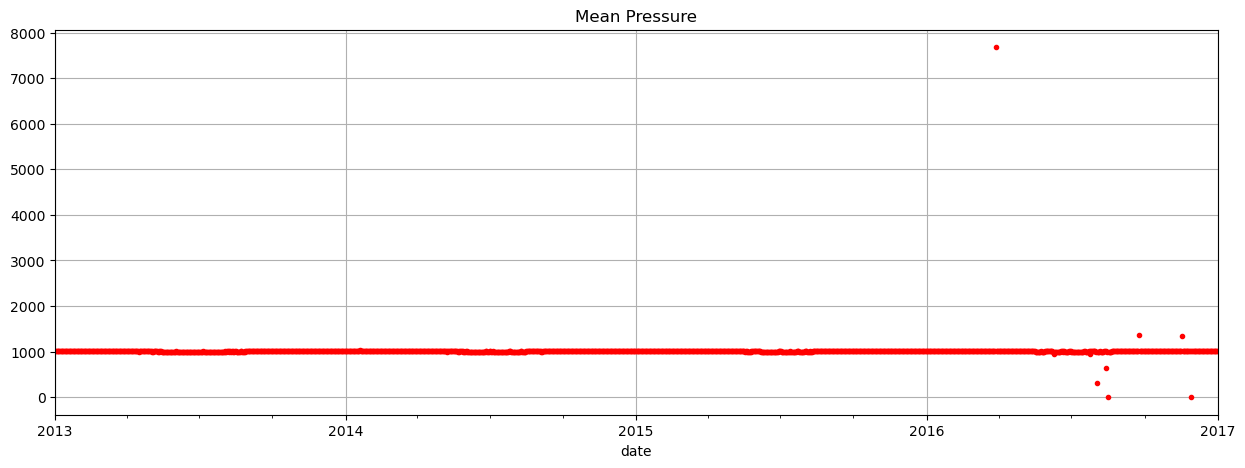

In [52]:
train_df['meanpressure'].plot(figsize=(15, 5), style='.',color="red")
plt.title("Mean Pressure")
plt.grid()
plt.show()

### Week-By-Week Exploration

<AxesSubplot:xlabel='week', ylabel='meantemp'>

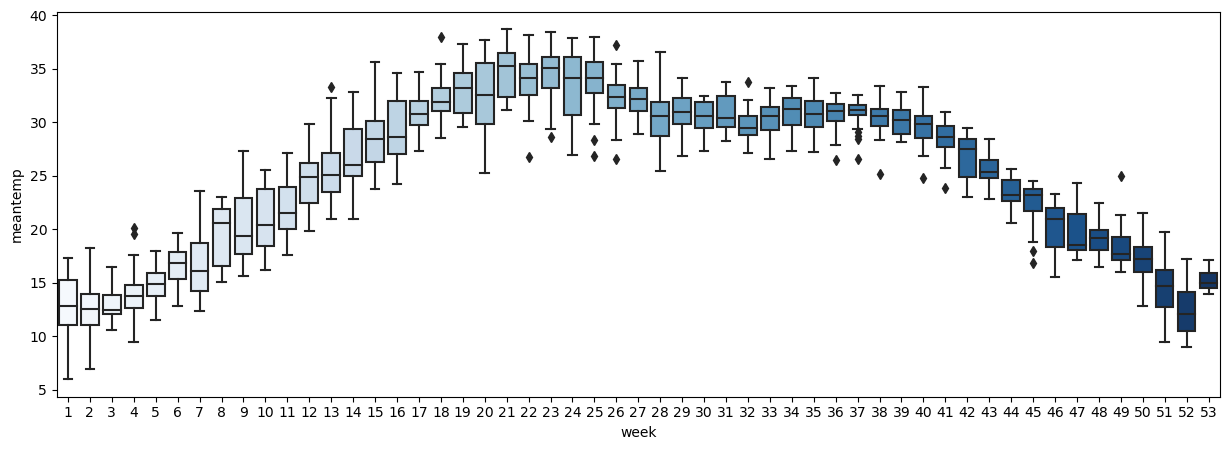

In [53]:
train_df['week'] = train_df.index.isocalendar().week
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='week', y='meantemp', palette='Blues')

<AxesSubplot:xlabel='week', ylabel='humidity'>

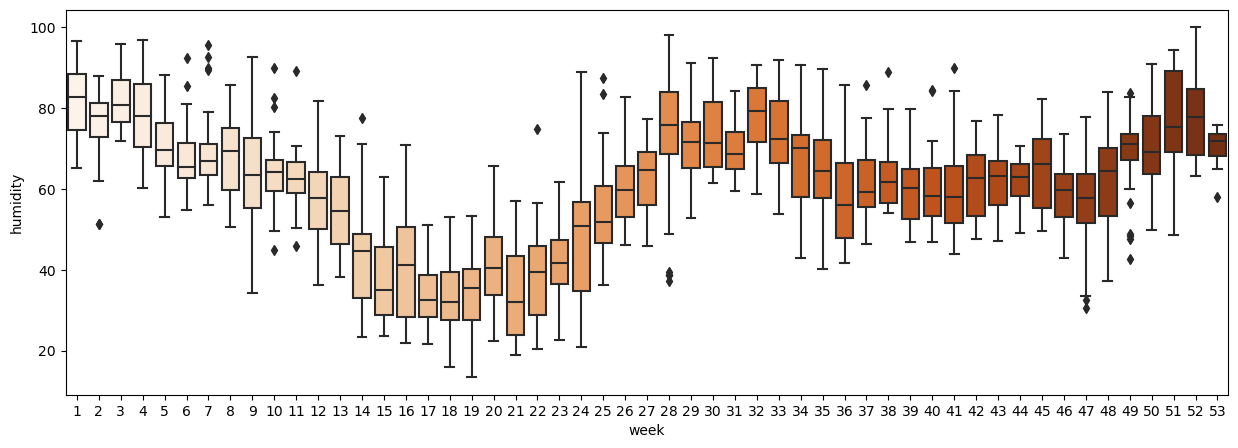

In [54]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='week', y='humidity', palette='Oranges')

<AxesSubplot:xlabel='week', ylabel='wind_speed'>

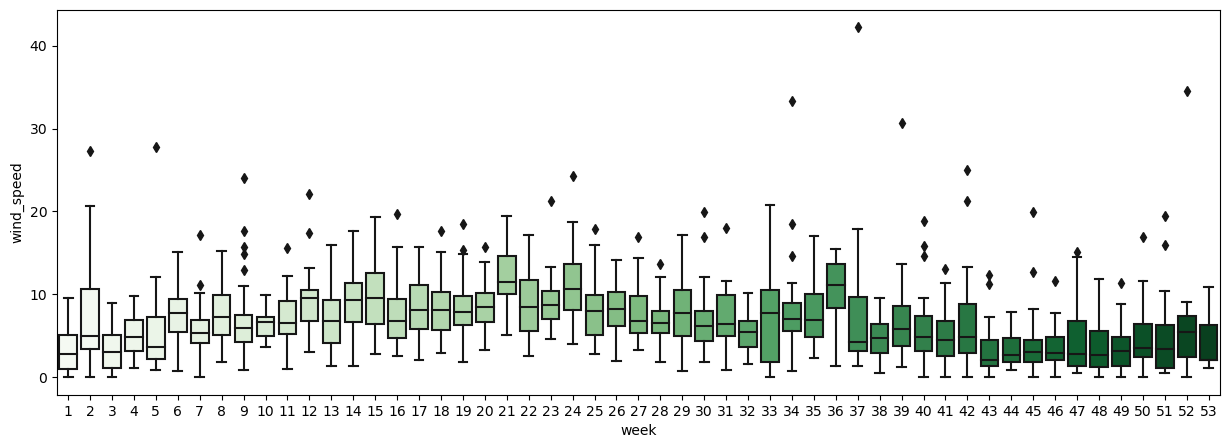

In [55]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='week', y='wind_speed', palette='Greens')

<AxesSubplot:xlabel='week', ylabel='meanpressure'>

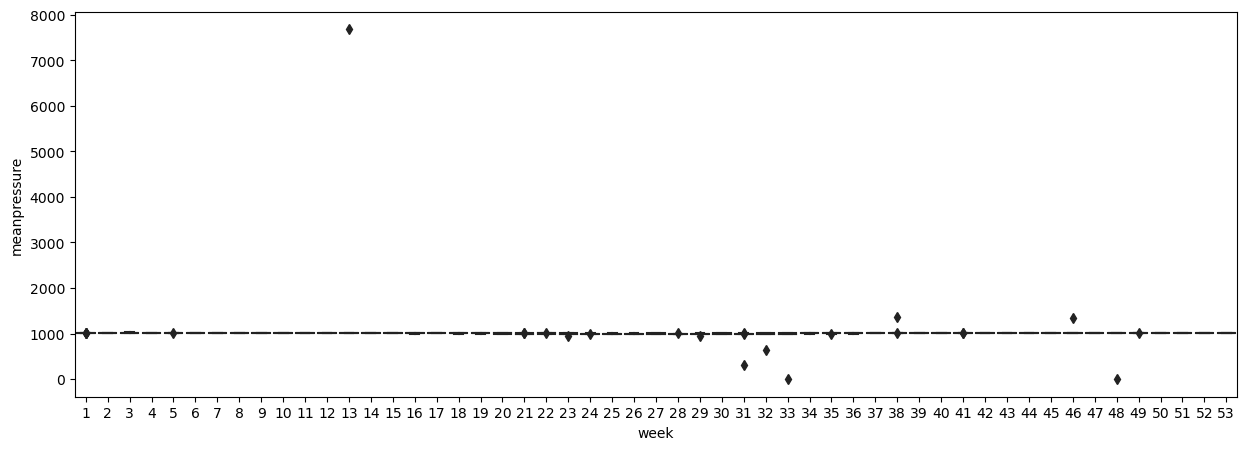

In [56]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='week', y='meanpressure',palette="Reds")

### Monthly Visulization

<AxesSubplot:xlabel='month', ylabel='meantemp'>

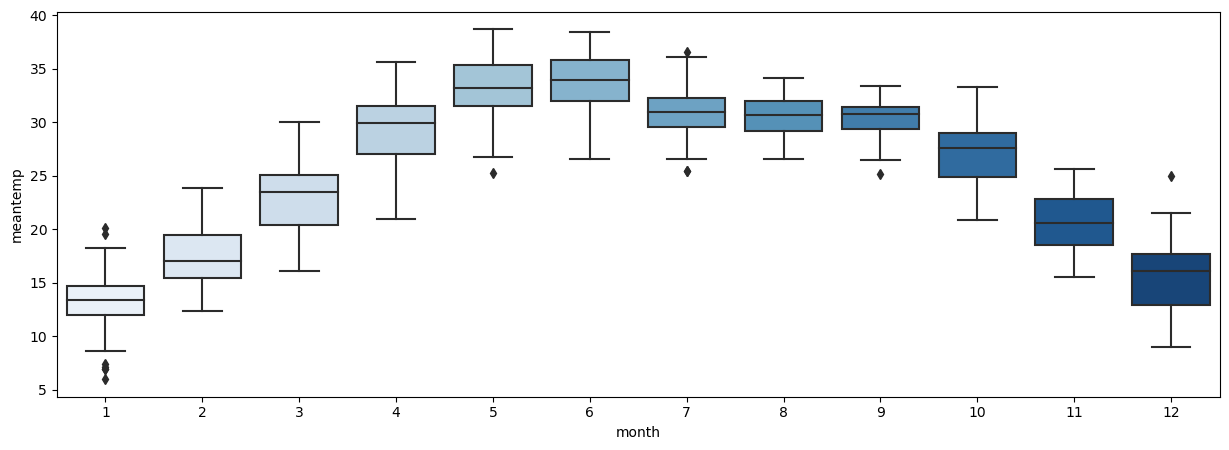

In [57]:
train_df['month'] = train_df.index.month
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='month', y='meantemp', palette='Blues')

<AxesSubplot:xlabel='month', ylabel='humidity'>

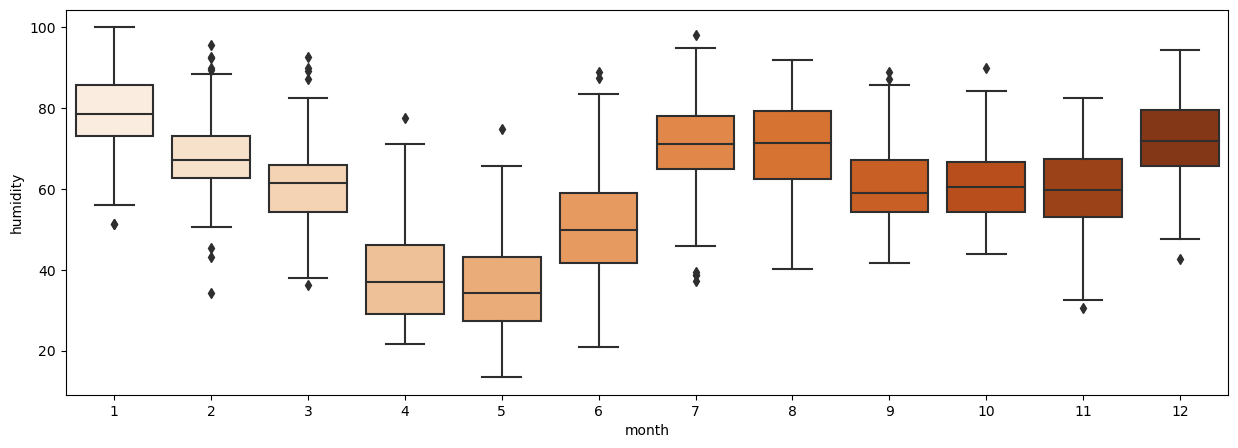

In [58]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='month', y='humidity', palette='Oranges')

<AxesSubplot:xlabel='month', ylabel='wind_speed'>

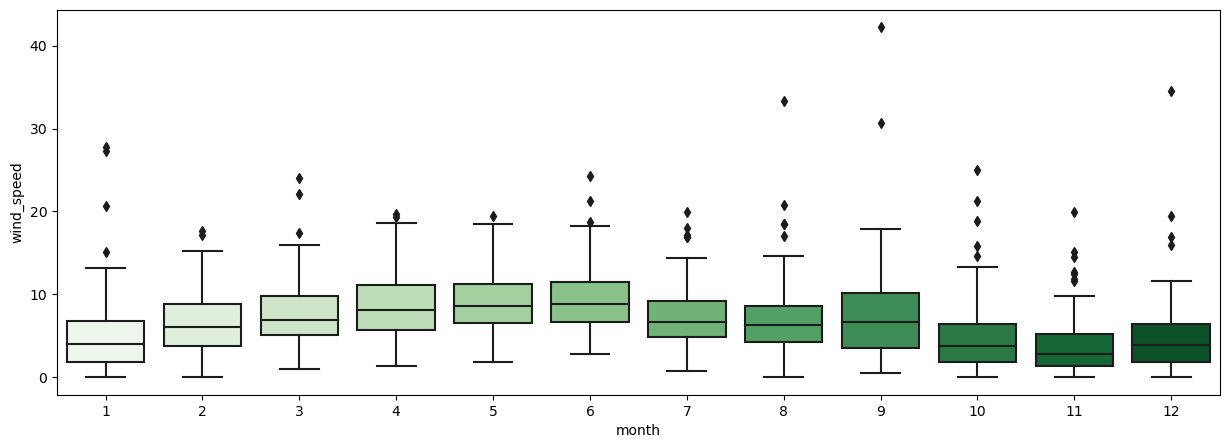

In [59]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='month', y='wind_speed', palette='Greens')

<AxesSubplot:xlabel='month', ylabel='meanpressure'>

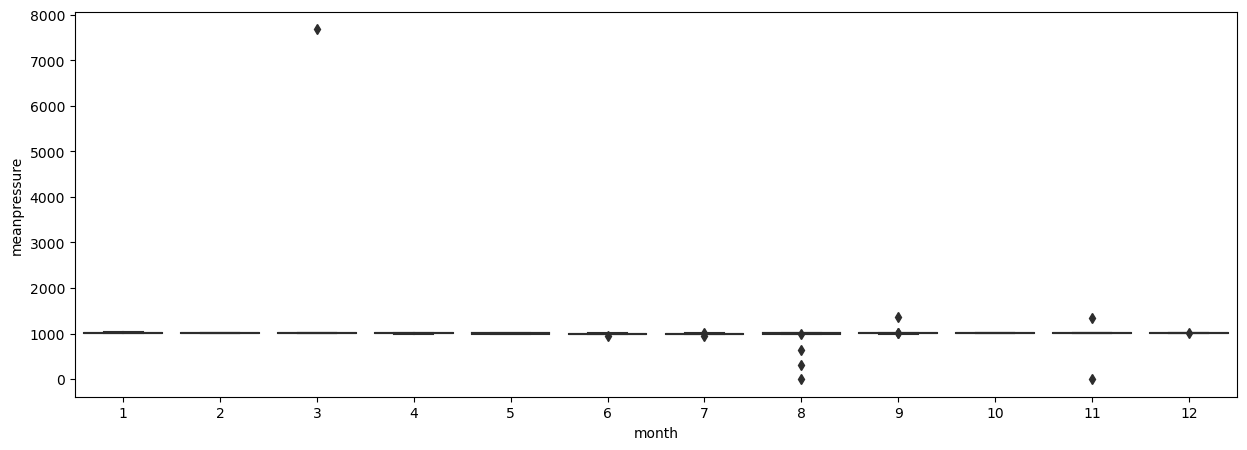

In [60]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_df, x='month', y='meanpressure', palette='Reds')

_We see some emerging seasonal patterns from the weekly and montlhy graphs, adding them as features will help in predicting the temapreature._

## Pre-Processing

In [61]:
train_df.head(20)

,meantemp,humidity,wind_speed,meanpressure,week,month
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,1
2013-01-06,7.000000,82.800000,1.480000,1018.000000,1,1
2013-01-07,7.000000,78.600000,6.300000,1020.000000,2,1
2013-01-08,8.857143,63.714286,7.142857,1018.714286,2,1
2013-01-09,14.000000,51.250000,12.500000,1017.000000,2,1


In [62]:
train_df.tail(20)

,meantemp,humidity,wind_speed,meanpressure,week,month
date,,,,,,
2016-12-13,19.050000,62.350000,3.430000,1015.100000,50,12
2016-12-14,18.555556,58.611111,8.027778,1017.333333,50,12
2016-12-15,18.166667,56.625000,9.879167,1016.666667,50,12
2016-12-16,15.833333,63.277778,3.916667,1018.777778,50,12
2016-12-17,17.500000,63.388889,6.731579,1016.947368,50,12
2016-12-18,16.083333,64.541667,6.420833,1018.083333,50,12
2016-12-19,17.857143,56.095238,10.414286,1017.428571,51,12
2016-12-20,19.800000,48.533333,15.926667,1015.200000,51,12
2016-12-21,18.050000,54.300000,19.404762,1015.619048,51,12


In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   week          1462 non-null   UInt32 
 5   month         1462 non-null   int64  
dtypes: UInt32(1), float64(4), int64(1)
memory usage: 75.7 KB


_The Training Dataset has no null values_

## Models

_We will be predicting the mean tempreature using the given train dataset, and evalute the perfomance of learned model on the given test data_

In [64]:
X = train_df.loc[:,train_df.columns != "meantemp"].values # Features
Y =  train_df["meantemp"].values # Target/Label

#### LS Linear Regression

In [65]:
LS_Linear_Regression = linear_model.LinearRegression(copy_X=True,fit_intercept=True).fit(X,Y)

In [66]:
print("R2 score : ",LS_Linear_Regression.score(X,Y))

R2 score :  0.3720610077960048


#### Ridge Regression

In [67]:
# LS Regression with L-2 penalty
Ridge_Regression_model = linear_model.Ridge(copy_X=True,fit_intercept=True)

# Fine Tune regulator (alpha)
ridge_cross_validation = model_selection.RepeatedKFold(n_splits=10,n_repeats=5)

grid = dict()
grid['alpha'] = np.arange(0, 2000, 1) 
# define search and find best using r2 score
Ridge_Regression = model_selection.GridSearchCV(Ridge_Regression_model, grid, scoring='r2', cv=ridge_cross_validation).fit(X, Y)

In [68]:
print("R2 score : ",Ridge_Regression.best_score_)
print('Config: %s' % Ridge_Regression.best_params_)

R2 score :  0.17612009291945604
Config: {'alpha': 0}


#### LASSO Regrssion

In [69]:
# LS Regression with L-2 penalty
Lasso_Regression_model = linear_model.Lasso(copy_X=True,fit_intercept=True)

# Fine Tune regulator (alpha)
lasso_cross_validation = model_selection.RepeatedKFold(n_splits=10,n_repeats=5)

grid = dict()
grid['alpha'] = np.arange(0.1, 2000, 1) 
# define search and find best using r2 score
Lasso_Regression = model_selection.GridSearchCV(Lasso_Regression_model, grid, scoring='r2', cv=lasso_cross_validation).fit(X, Y)

In [70]:
print("R2 score : ",Lasso_Regression.best_score_)
print('Config : %s' % Lasso_Regression.best_params_)

R2 score :  0.2197103211750509
Config : {'alpha': 31.1}


## Evalute Peformance

In [71]:
test_df.set_index("date", inplace=True)
test_df.index = pd.to_datetime(test_df.index)

In [72]:
test_df['week'] = test_df.index.isocalendar().week
test_df["week"][0] = 1
test_df['month'] = test_df.index.month
test_df.head()

,meantemp,humidity,wind_speed,meanpressure,week,month
date,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,1,1
2017-01-02,18.500000,77.222222,2.894444,1018.277778,1,1
2017-01-03,17.111111,81.888889,4.016667,1018.333333,1,1
2017-01-04,18.700000,70.050000,4.545000,1015.700000,1,1
2017-01-05,18.388889,74.944444,3.300000,1014.333333,1,1


In [73]:
X_test = np.concatenate((train_df.loc[:,train_df.columns != "meantemp"].values,test_df.loc[:,test_df.columns != "meantemp"].values)) # Features
Y_test =  np.concatenate((train_df["meantemp"].values,test_df["meantemp"].values)) # Target/Label

df = pd.DataFrame(Y_test,index=np.concatenate((train_df.index,test_df.index)),columns=["Ture Mean Tempreature"])

#### LS Linear Regression

In [74]:
LS_Prediction = LS_Linear_Regression.predict(X_test)
LS_df = pd.DataFrame(LS_Prediction,index=np.concatenate((train_df.index,test_df.index)),columns=["LS Prediction"])
df = pd.concat([df,LS_df],axis=1)

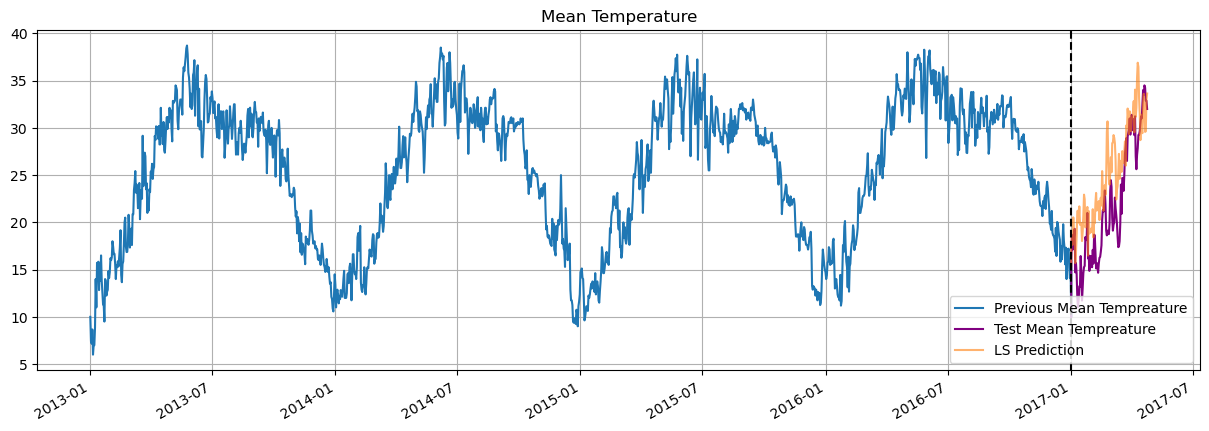

In [75]:
df['Ture Mean Tempreature'][:'2017-01-01'].plot(figsize=(15, 5),label="Previous Mean Tempreature")
df['Ture Mean Tempreature']['2017-01-01':].plot(figsize=(15, 5),color="purple",label="Test Mean Tempreature")
df['LS Prediction']['2017-01-01':].plot(figsize=(15, 5),alpha=0.6)
plt.axvline('2017-01-01', color='black', ls='--')
plt.title("Mean Temperature")
plt.legend()
plt.grid()
plt.show()

In [76]:
LS_RSS = np.sum(np.square(df['LS Prediction']['2017-01-01':] - df['Ture Mean Tempreature']['2017-01-01':]))
LS_TSS = np.sum(np.square(df['Ture Mean Tempreature']['2017-01-01':] - df['Ture Mean Tempreature']['2017-01-01':].mean()))
LS_R2 = 1 - (LS_RSS/LS_TSS)

print(' Residual sum of squares (RSS) is : '+ str(LS_RSS))
print(' Total sum of squares (TSS) is : '+ str(LS_TSS))
print(' R2 statistic is : '+ str(LS_R2))

 Residual sum of squares (RSS) is : 2710.044703884493
 Total sum of squares (TSS) is : 4706.911280329122
 R2 statistic is : 0.42424138835797254


#### Ridge Regression

In [77]:
Ridge_Prediction = Ridge_Regression.predict(X_test)
Ridge_df = pd.DataFrame(Ridge_Prediction,index=np.concatenate((train_df.index,test_df.index)),columns=["Ridge Prediction"])
df = pd.concat([df,Ridge_df],axis=1)

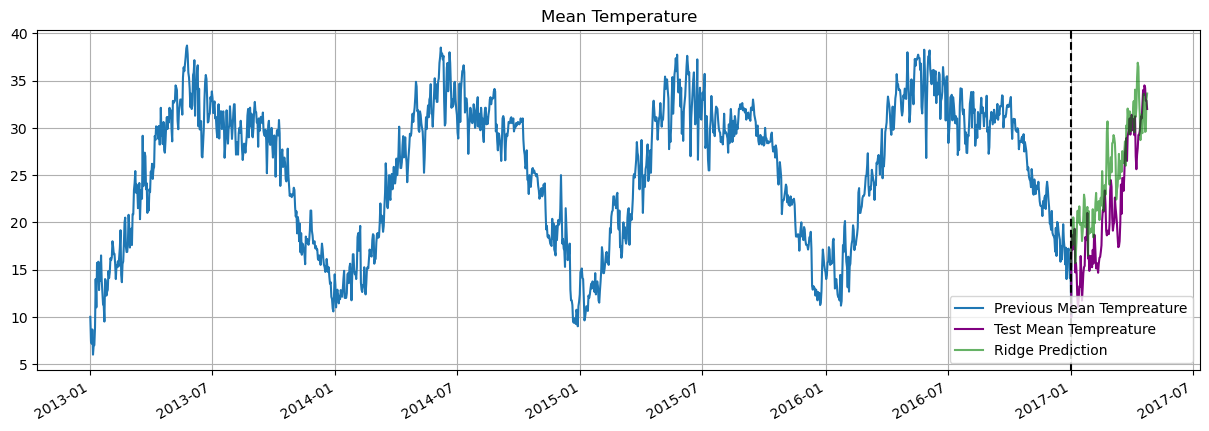

In [78]:
df['Ture Mean Tempreature'][:'2017-01-01'].plot(figsize=(15, 5),label="Previous Mean Tempreature")
df['Ture Mean Tempreature']['2017-01-01':].plot(figsize=(15, 5),color="purple",label="Test Mean Tempreature")
df["Ridge Prediction"]['2017-01-01':].plot(figsize=(15, 5),alpha=0.6,color="green")
plt.axvline('2017-01-01', color='black', ls='--')
plt.title("Mean Temperature")
plt.legend()
plt.grid()
plt.show()

In [79]:
Ridge_RSS = np.sum(np.square(df['Ridge Prediction']['2017-01-01':] - df['Ture Mean Tempreature']['2017-01-01':]))
Ridge_TSS = np.sum(np.square(df['Ture Mean Tempreature']['2017-01-01':] - df['Ture Mean Tempreature']['2017-01-01':].mean()))
Ridge_R2 = 1 - (Ridge_RSS/Ridge_TSS)

print(' Residual sum of squares (RSS) is : '+ str(Ridge_RSS))
print(' Total sum of squares (TSS) is : '+ str(Ridge_TSS))
print(' R2 statistic is : '+ str(Ridge_R2))

 Residual sum of squares (RSS) is : 2710.0447038844986
 Total sum of squares (TSS) is : 4706.911280329122
 R2 statistic is : 0.4242413883579713


#### LASSO Regression

In [80]:
Lasso_Prediction = Lasso_Regression.predict(X_test)
Lasso_df = pd.DataFrame(Lasso_Prediction,index=np.concatenate((train_df.index,test_df.index)),columns=["Lasso Prediction"])
df = pd.concat([df,Lasso_df],axis=1)

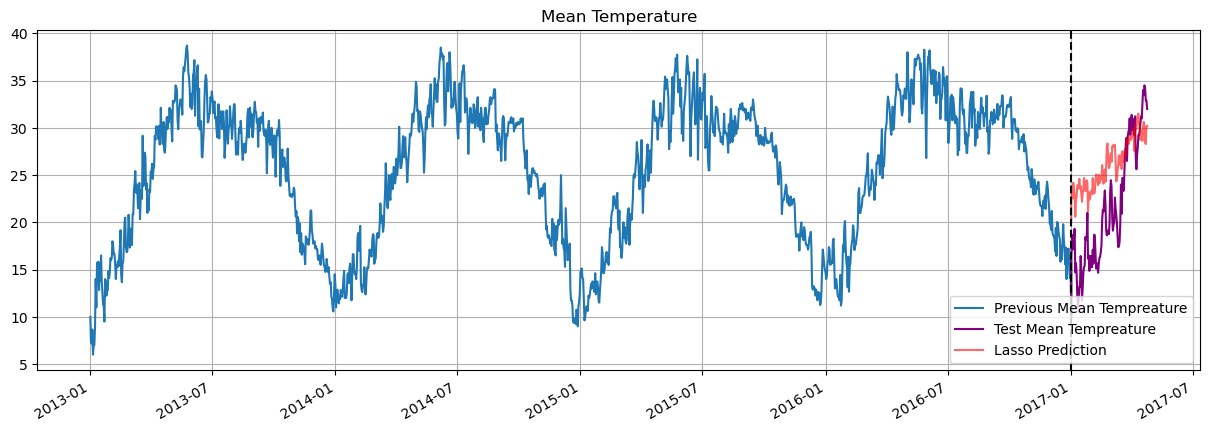

In [81]:
df['Ture Mean Tempreature'][:'2017-01-01'].plot(figsize=(15, 5),label="Previous Mean Tempreature")
df['Ture Mean Tempreature']['2017-01-01':].plot(figsize=(15, 5),color="purple",label="Test Mean Tempreature")
df["Lasso Prediction"]['2017-01-01':].plot(figsize=(15, 5),alpha=0.6,color="red")
plt.axvline('2017-01-01', color='black', ls='--')
plt.title("Mean Temperature")
plt.legend()
plt.grid()
plt.show()

In [82]:
Lasso_RSS = np.sum(np.square(df['Lasso Prediction']['2017-01-01':] - df['Ture Mean Tempreature']['2017-01-01':]))
Lasso_TSS = np.sum(np.square(df['Ture Mean Tempreature']['2017-01-01':] - df['Ture Mean Tempreature']['2017-01-01':].mean()))
Lasso_R2 = 1 - (Lasso_RSS/Lasso_TSS)

print(' Residual sum of squares (RSS) is : '+ str(Lasso_RSS))
print(' Total sum of squares (TSS) is : '+ str(Lasso_TSS))
print(' R2 statistic is : '+ str(Lasso_R2))

 Residual sum of squares (RSS) is : 4410.721867576747
 Total sum of squares (TSS) is : 4706.911280329122
 R2 statistic is : 0.0629264915168879


_From all the graphs of diffrent models, and their respecive R-2 stastic. we can conclude that for this particular weather forceasting model, we should utilize the Least Square Linear Regression , or Ridge Regrssion. I included Ridge Regression,beaucse it's R-2 stastic is very close to that of LS Regression._

_Also, one more thing to note is that Ridge Regression used alpha=0, this indicated that Ridge Regrssion works the best when it is modeled like LS Linear Regression._

_Both, the LS Linear Regression and Ridge Regression Models manage to predict the sesonality of the tempreature, by having an increased temprature as we progress trough the year. However none of the models, were pefectly able to predict the day to day changes in the tempreature._

## Bibliography
1. Dataset : https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv
2. Linear Regression Usage Tutorial : https://www.irjet.net/archives/V8/i6/IRJET-V8I6454.pdf
